In [1]:
!pip install PyPDF2

In [2]:
pip install numpy==1.26.4

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install python-docx

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import docx
import pandas as pd

# Function to extract text from .docx files
def extract_docx_text(docx_path):
    try:
        doc = docx.Document(docx_path)
        text = ''
        for para in doc.paragraphs:
            text += para.text + '\n'
        return text.strip()  # Strip any trailing whitespace
    except Exception as e:
        print(f"Error reading .docx file {docx_path}: {e}")
        return ''

# Function to extract text from .doc files (Windows only)
# You need pywin32 installed (via pip install pywin32)
def extract_doc_text(doc_path):
    try:
        import win32com.client
        word = win32com.client.Dispatch("Word.Application")
        doc = word.Documents.Open(doc_path)
        text = doc.Content.Text
        doc.Close()
        word.Quit()
        return text.strip()  # Strip any trailing whitespace
    except Exception as e:
        print(f"Error reading .doc file {doc_path}: {e}")
        return ''

# Set the folder path where your subfolders are located
folder_path = r'C:\Users\yellu\Downloads\P548_dataset\P-344 Dataset'

# Initialize lists to hold file names, job roles, and extracted content
file_names = []
job_roles = []
content_list = []

# Loop through all subdirectories and files in the folder
for subdir, _, files in os.walk(folder_path):
    for file_name in files:
        file_path = os.path.join(subdir, file_name)

        # Get the file extension
        file_extension = os.path.splitext(file_name)[-1].lower()  # Get extension and make it lowercase

        # If there's no extension, assume it's a Word document and append .docx
        if not file_extension:
            print(f"Warning: {file_name} doesn't have an extension, assuming it's a .docx file.")
            file_extension = '.docx'
            file_name = file_name + '.docx'
            file_path = os.path.join(subdir, file_name)  # Update file path with .docx extension
        
        # Extract job role (subfolder name)
        job_role = os.path.basename(subdir)  # Get the name of the subfolder
        
        # Debugging: Print out the file name, job role, and extension
        print(f"Processing file: {file_name} (Extension: {file_extension}) in Job Role: {job_role}")

        # Only process .docx and .doc files
        if file_extension == '.docx':
            # Extract the content from the .docx file
            content = extract_docx_text(file_path)
            if content:  # Check if we got some content
                file_names.append(file_name)
                job_roles.append(job_role)
                content_list.append(content)
            else:
                print(f"Warning: No content extracted from {file_name}")
            
        elif file_extension == '.doc':
            # Extract the content from the .doc file (Windows only)
            content = extract_doc_text(file_path)
            if content:  # Check if we got some content
                file_names.append(file_name)
                job_roles.append(job_role)
                content_list.append(content)
            else:
                print(f"Warning: No content extracted from {file_name}")

# Check if we have collected data
if not file_names:
    print("No files processed successfully. Please check if files are in the correct format.")
else:
    # Create a DataFrame from the lists, including job roles
    df = pd.DataFrame({
        'file_name': file_names,
        'jobrole': job_roles,  # New column for job role
        'content': content_list
    })

    # Save the DataFrame to a CSV file
    df.to_csv('extracted_resume_data_combined.csv', index=False)

    print("Content extracted and saved to 'extracted_resume_data_combined.csv'")


Processing file: Peoplesoft Admin_G Ananda Rayudu.docx (Extension: .docx) in Job Role: Peoplesoft
Error reading .docx file C:\Users\yellu\Downloads\P548_dataset\P-344 Dataset\Resumes_Docx\Peoplesoft\Peoplesoft Admin_G Ananda Rayudu.docx: "no relationship of type 'http://schemas.openxmlformats.org/officeDocument/2006/relationships/officeDocument' in collection"
Processing file: Peoplesoft Admin_AnubhavSingh.docx (Extension: .docx) in Job Role: Peoplesoft Resume
Processing file: Peoplesoft Admin_G Ananda Rayudu.doc (Extension: .doc) in Job Role: Peoplesoft Resume
Processing file: Peoplesoft Admin_Gangareddy.doc (Extension: .doc) in Job Role: Peoplesoft Resume
Processing file: Peoplesoft Admin_Murali.docx (Extension: .docx) in Job Role: Peoplesoft Resume
Processing file: Peoplesoft Admin_Priyanka Ramadoss.doc (Extension: .doc) in Job Role: Peoplesoft Resume
Processing file: Peoplesoft Admin_SirazuddinMohammad.docx (Extension: .docx) in Job Role: Peoplesoft Resume
Processing file: Peopleso

In [5]:
from IPython.display import FileLink
# Create a download link for the generated CSV file
FileLink(r'extracted_resume_data_combined.csv')

C:\Users\yellu\python_practise\extracted_resume_data_combined.csv

In [6]:
data1=pd.read_csv('extracted_resume_data_combined.csv')

In [7]:
data1.head()

,file_name,jobrole,content
0,Peoplesoft Admin_AnubhavSingh.docx,Peoplesoft Resume,Anubhav Kumar Singh\t\t\n\n To work in a glob...
1,Peoplesoft Admin_G Ananda Rayudu.doc,Peoplesoft Resume,Profile Summary:\t\t\t\t\t\t\t\t\t\t\r7+ years...
2,Peoplesoft Admin_Gangareddy.doc,Peoplesoft Resume,PeopleSoft Database Administrator\r ...
3,Peoplesoft Admin_Murali.docx,Peoplesoft Resume,Murali\n\nExperience Summary \n\nI have 6 year...
4,Peoplesoft Admin_Priyanka Ramadoss.doc,Peoplesoft Resume,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo..."


In [8]:
print(df.columns)

Index(['file_name', 'jobrole', 'content'], dtype='object')


### Preprocessing

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
df.isnull().sum()

file_name    0
jobrole      0
content      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  78 non-null     object
 1   jobrole    78 non-null     object
 2   content    78 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


In [12]:
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download only required components
nltk.download('stopwords')
nltk.download('wordnet')

# Set up stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Clean and preprocess text (using simple .split instead of nltk.tokenize)
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation/numbers
    tokens = text.split()  # simple split (avoids punkt tokenizer)

    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Apply to your DataFrame (based on your column: content)
df['clean_text'] = df['content'].apply(preprocess_text)

# View result
df[['clean_text', 'jobrole']]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yellu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yellu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,clean_text,jobrole
0,anubhav kumar singh work globally competitive ...,Peoplesoft Resume
1,profile summary year experience implementing u...,Peoplesoft Resume
2,peoplesoft database administrator gangareddy p...,Peoplesoft Resume
3,murali experience summary year experience work...,Peoplesoft Resume
4,priyanka ramadoss mountpleasant coonoor nilgir...,Peoplesoft Resume
...,...,...
73,workday integration consultant name sri krishn...,workday
74,seeking suitable position workday hcm techno f...,workday
75,workday hcm fcm name kumar s role workday cons...,workday
76,venkateswarlub workday consultant year experie...,workday


In [13]:
df.shape

(78, 4)

### Count Plot

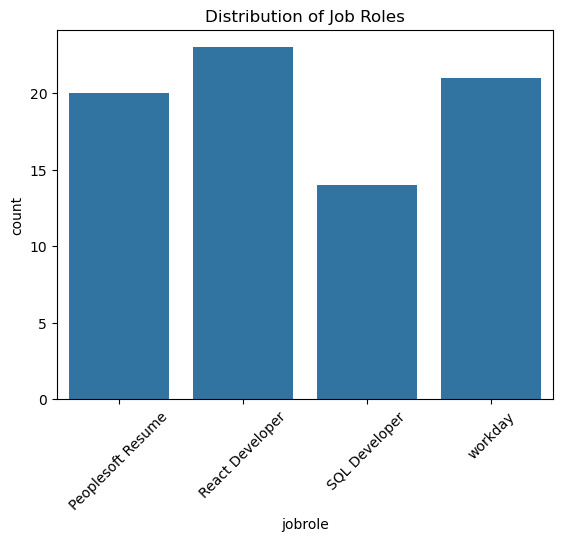

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a count plot to show how many resumes belong to each job role
sns.countplot(data=df, x='jobrole')
plt.title('Distribution of Job Roles')
plt.xticks(rotation=45)
plt.show()

### HISTOGRAM

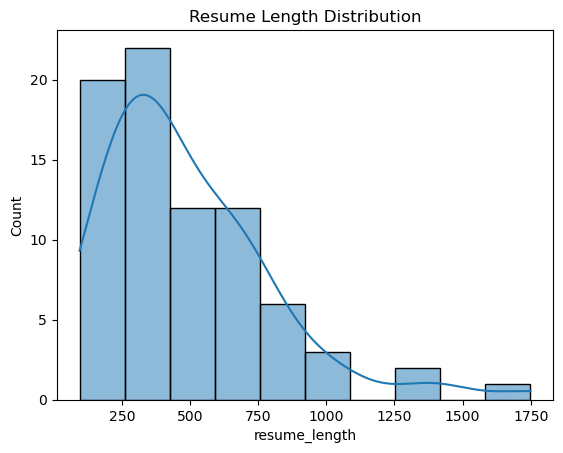

In [15]:
df['resume_length'] = df['clean_text'].apply(lambda x: len(str(x).split()))
# Plot a histogram to visualize the distribution of resume lengths
sns.histplot(data=df, x='resume_length', kde=True)
plt.title('Resume Length Distribution')
plt.show()

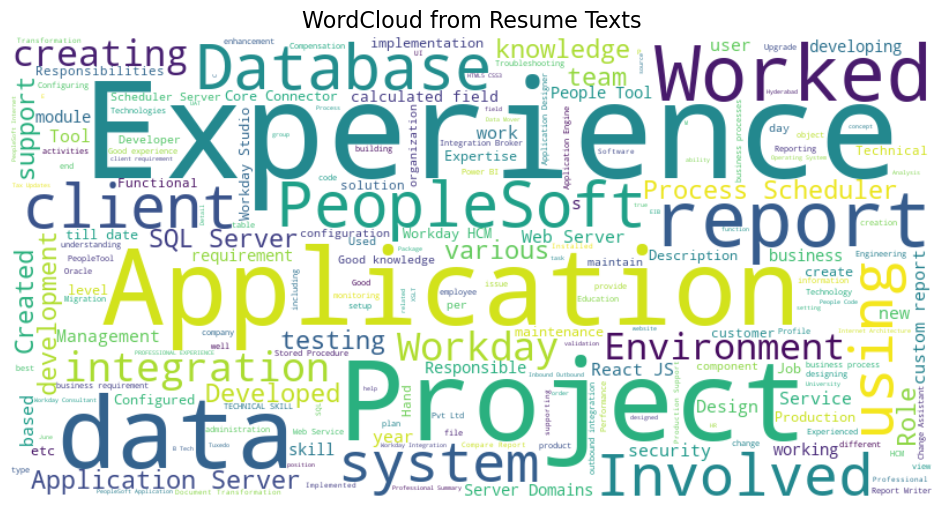

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all raw resume texts into one string
all_text = ' '.join(df['content'].dropna())

# Create and configure the WordCloud
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      colormap='viridis',
                      max_words=200).generate(all_text)

# Plot the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud from Resume Texts", fontsize=16)
plt.show()

#### TF-IDF  Feature Extraction

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize TF-IDF Vectorizer with max 5000 features
tfidf = TfidfVectorizer(max_features=5000)
# Apply it to the cleaned resume text
X = tfidf.fit_transform(df['clean_text'])  
y = df['jobrole']

#### Label Encoder

In [18]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
le = LabelEncoder()
# Convert 'jobrole' column to numeric labels
y = le.fit_transform(df['jobrole'])
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping (Jobrole to Number):", label_mapping)

Label Mapping (Jobrole to Number): {'Peoplesoft Resume': 0, 'React Developer': 1, 'SQL Developer': 2, 'workday': 3}


### Model training

#### Logistic Regression

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text'])
y = df['jobrole']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)

In [23]:
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
log_train_pred = log_model.predict(X_train)

In [25]:
log_test_pred = log_model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, classification_report
print("Logistic Regression - Training Set Evaluation")
print("Accuracy:", accuracy_score(y_train, log_train_pred))
print("Classification Report:\n", classification_report(y_train, log_train_pred))

Logistic Regression - Training Set Evaluation
Accuracy: 1.0
Classification Report:
                    precision    recall  f1-score   support

Peoplesoft Resume       1.00      1.00      1.00        15
  React Developer       1.00      1.00      1.00        19
    SQL Developer       1.00      1.00      1.00        11
          workday       1.00      1.00      1.00        17

         accuracy                           1.00        62
        macro avg       1.00      1.00      1.00        62
     weighted avg       1.00      1.00      1.00        62



In [27]:
print("Logistic Regression - Testing Set Evaluation")
print("Accuracy:", accuracy_score(y_test, log_test_pred))
print("Classification Report:\n", classification_report(y_test, log_test_pred))

Logistic Regression - Testing Set Evaluation
Accuracy: 0.9375
Classification Report:
                    precision    recall  f1-score   support

Peoplesoft Resume       1.00      0.80      0.89         5
  React Developer       0.80      1.00      0.89         4
    SQL Developer       1.00      1.00      1.00         3
          workday       1.00      1.00      1.00         4

         accuracy                           0.94        16
        macro avg       0.95      0.95      0.94        16
     weighted avg       0.95      0.94      0.94        16



#### Naive Bayes

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()

In [30]:
nb_model.fit(X_train, y_train)

MultinomialNB()

In [31]:
nb_train_pred = nb_model.predict(X_train)

In [32]:
nb_test_pred = nb_model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, classification_report
print("Naive Bayes - Training Set Evaluation")
print("Accuracy:", accuracy_score(y_train, nb_train_pred))
print("Classification Report:\n", classification_report(y_train, nb_train_pred))

Naive Bayes - Training Set Evaluation
Accuracy: 1.0
Classification Report:
                    precision    recall  f1-score   support

Peoplesoft Resume       1.00      1.00      1.00        15
  React Developer       1.00      1.00      1.00        19
    SQL Developer       1.00      1.00      1.00        11
          workday       1.00      1.00      1.00        17

         accuracy                           1.00        62
        macro avg       1.00      1.00      1.00        62
     weighted avg       1.00      1.00      1.00        62



In [34]:
print("Naive Bayes - Testing Set Evaluation")
print("Accuracy:", accuracy_score(y_test, nb_test_pred))
print("Classification Report:\n", classification_report(y_test, nb_test_pred))

Naive Bayes - Testing Set Evaluation
Accuracy: 0.9375
Classification Report:
                    precision    recall  f1-score   support

Peoplesoft Resume       1.00      0.80      0.89         5
  React Developer       1.00      1.00      1.00         4
    SQL Developer       1.00      1.00      1.00         3
          workday       0.80      1.00      0.89         4

         accuracy                           0.94        16
        macro avg       0.95      0.95      0.94        16
     weighted avg       0.95      0.94      0.94        16



### SVM

In [35]:
from sklearn.svm import SVC
svm_model = SVC()

In [36]:
svm_model.fit(X_train, y_train)

SVC()

In [37]:
svm_train_pred = svm_model.predict(X_train)

In [38]:
svm_test_pred = svm_model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, classification_report
print("SVM - Training Set Evaluation")
print("Accuracy:", accuracy_score(y_train, svm_train_pred))
print("Classification Report:\n", classification_report(y_train, svm_train_pred))

SVM - Training Set Evaluation
Accuracy: 1.0
Classification Report:
                    precision    recall  f1-score   support

Peoplesoft Resume       1.00      1.00      1.00        15
  React Developer       1.00      1.00      1.00        19
    SQL Developer       1.00      1.00      1.00        11
          workday       1.00      1.00      1.00        17

         accuracy                           1.00        62
        macro avg       1.00      1.00      1.00        62
     weighted avg       1.00      1.00      1.00        62



In [40]:
print("SVM - Testing Set Evaluation")
print("Accuracy:", accuracy_score(y_test, svm_test_pred))
print("Classification Report:\n", classification_report(y_test, svm_test_pred))

SVM - Testing Set Evaluation
Accuracy: 0.9375
Classification Report:
                    precision    recall  f1-score   support

Peoplesoft Resume       1.00      0.80      0.89         5
  React Developer       0.80      1.00      0.89         4
    SQL Developer       1.00      1.00      1.00         3
          workday       1.00      1.00      1.00         4

         accuracy                           0.94        16
        macro avg       0.95      0.95      0.94        16
     weighted avg       0.95      0.94      0.94        16



#### Random Forest

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [43]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
train_pred = rf_model.predict(X_train)

In [45]:
test_pred = rf_model.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, classification_report
print("Training Set Evaluation")
print("Accuracy:", accuracy_score(y_train, train_pred))
print("Classification Report:\n", classification_report(y_train, train_pred))

Training Set Evaluation
Accuracy: 1.0
Classification Report:
                    precision    recall  f1-score   support

Peoplesoft Resume       1.00      1.00      1.00        15
  React Developer       1.00      1.00      1.00        19
    SQL Developer       1.00      1.00      1.00        11
          workday       1.00      1.00      1.00        17

         accuracy                           1.00        62
        macro avg       1.00      1.00      1.00        62
     weighted avg       1.00      1.00      1.00        62



In [47]:
print("Testing Set Evaluation")
print("Accuracy:", accuracy_score(y_test, test_pred))
print("Classification Report:\n", classification_report(y_test, test_pred))

Testing Set Evaluation
Accuracy: 0.9375
Classification Report:
                    precision    recall  f1-score   support

Peoplesoft Resume       1.00      0.80      0.89         5
  React Developer       0.80      1.00      0.89         4
    SQL Developer       1.00      1.00      1.00         3
          workday       1.00      1.00      1.00         4

         accuracy                           0.94        16
        macro avg       0.95      0.95      0.94        16
     weighted avg       0.95      0.94      0.94        16



#### Deployment

In [48]:
!pip install pymupdf

In [49]:
import fitz
print("PyMuPDF is installed and working!")

PyMuPDF is installed and working!


In [50]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Assuming df['clean_text'] and df['jobrole'] are ready

# 1. TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text'])

# 2. Label encoding (must include 'React Developer')
le = LabelEncoder()
y = le.fit_transform(df['jobrole'])

# 3. Train model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X, y)

# 4. Save all components
with open('log_model.pkl', 'wb') as f:
    pickle.dump(log_model, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

print("All model files saved successfully.")

All model files saved successfully.
